In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('Real estate.csv')

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
df = df.drop(['No', 'X5 latitude','X6 longitude'], axis = 1)

In [8]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [10]:
df['X1 transaction date'] = df['X1 transaction date'].astype(str).str.extract(r'^(\d{4})')[0]
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [11]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [14]:
X = df[['X1 transaction date', 'X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']]
Y = df['Y house price of unit area']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [37]:
X.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
X1 transaction date,1.000000,0.017549,0.060880,0.009635
X2 house age,0.017549,1.000000,0.025622,0.049593
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000


In [68]:
Lregression = LinearRegression()

In [69]:
Lregression.fit(X_train,y_train)

LinearRegression()

In [72]:
score = Lregression.score(X_train, y_train)
score

0.5529449891711891

In [73]:
y_pred_lr = Lregression.predict(X_test)

In [74]:
y_pred_lr

array([49.46280405, 42.6611182 , 42.54731927, 39.16131633, 26.69841485,
       46.11893472, 42.67105527, 44.76594699, 27.92456737, 55.19587693,
       34.40214451, 36.03293687, 31.82693477, 27.34231725, 34.36217003,
       34.28816313, 45.09528267, 48.78690415, 29.77899038, 45.85581673,
       -0.26413629, 34.40855802, 46.65404908, 48.04562307, 13.50410849,
       38.51577985, 14.13084603, 40.92306213, 37.65277528, 36.06084631,
       13.68710107, 38.07487417, 37.842945  , 31.33094364, 45.73169078,
       31.44850697, 51.02896642, 15.74581707, 48.97929584, 41.65896349,
       37.10703129, 40.39963159, 46.32297161, 35.29446293, 41.08260692,
       46.56534691, 45.0212891 , 22.46307153, 48.33326636, 44.47892301,
       50.00205742, 47.058577  , 42.07800031, 43.50358486, 36.96376653,
       16.80794791, 39.97589727, 32.80033739, 27.7083028 , 44.22669362,
       32.3412336 , 30.09738003, 16.80794791,  8.45127837,  6.08396193,
       33.34642719, 31.86102314, 48.51581026, 32.36212768, 35.18

In [51]:
poly = PolynomialFeatures(degree=2)

In [67]:
x_poly = poly.fit_transform(X_train)
test_poly = poly.fit_transform(X_test)

liRegressionmodel = LinearRegression()
liRegressionmodel.fit(x_poly, y_train)

LinearRegression()

In [55]:
YPredict = liRegressionmodel.predict(test_poly)

In [56]:
YPredict

array([54.69605653, 40.34619024, 50.79292173, 40.70126627, 19.33707831,
       46.69638065, 41.53747618, 43.9475919 , 26.20855759, 57.84103324,
       29.27789729, 31.27592383, 28.73793907, 25.62198427, 35.43313213,
       29.14204824, 45.60286925, 53.69391473, 19.20136821, 42.69297193,
       22.31333151, 27.31238231, 48.46350467, 48.06289463, 16.65735459,
       40.01459537, 16.08001664, 49.15195656, 43.57836259, 40.92389778,
       20.10097602, 34.51769717, 38.44981357, 26.7054848 , 43.95945862,
       33.53301458, 52.51071709, 17.02599741, 46.91717237, 46.79526472,
       41.1091819 , 37.62344302, 47.22116087, 33.02740941, 39.41440042,
       45.87344721, 40.33871426, 19.88035963, 55.5583047 , 46.82436761,
       55.42593862, 49.78132486, 41.99295915, 41.10445493, 36.15861408,
       17.78556631, 42.1403445 , 29.39891006, 19.47833817, 43.16086062,
       25.10063623, 25.7874475 , 17.78556631, 16.36121862, 21.80681591,
       25.61319377, 27.89746727, 43.51483473, 34.48018185, 32.57

#Linear Regression

In [75]:
mse = mean_squared_error(y_test,y_pred_lr)
mse

74.68529290900015

In [76]:
r2 = r2_score(y_test,y_pred_lr)
r2

0.5533847150236588

#Polinomial Regression

In [78]:
polymse = mean_squared_error(y_test,YPredict)
polymse

60.669986762922306

In [79]:
r2_poly = r2_score(y_test, YPredict)
r2_poly

0.6371957265984278

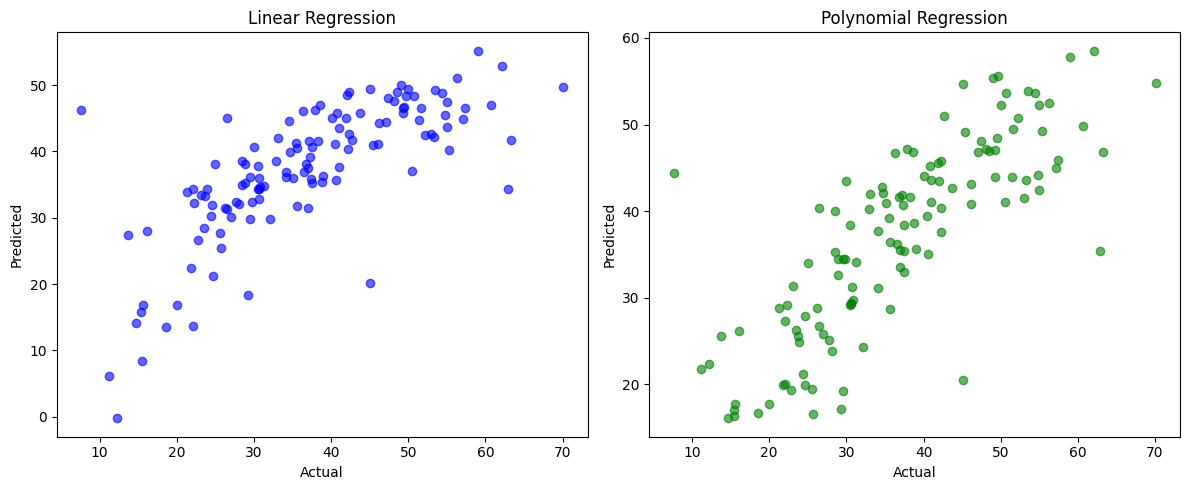

In [84]:
plt.figure(figsize=(12, 5))

# Linear
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
#plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

# Polynomial
plt.subplot(1, 2, 2)
plt.scatter(y_test, YPredict, color='green', alpha=0.6)
#plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Polynomial Regression')

plt.tight_layout()
plt.show()
